In [75]:
import pandas as pd
data=pd.read_csv('weather_classification_data.csv')
data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [76]:
data.head(1).T

,0
Temperature,14.0
Humidity,73
Wind Speed,9.5
Precipitation (%),82.0
Cloud Cover,partly cloudy
Atmospheric Pressure,1010.82
UV Index,2
Season,Winter
Visibility (km),3.5
Location,inland


In [77]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
for col in ['Season','Weather Type','Cloud Cover','Location']:
    data[col] =lb.fit_transform(data[col])




In [78]:
import warnings
warnings.filterwarnings('ignore',module='sklearn')
from sklearn.preprocessing import MinMaxScaler
msc=MinMaxScaler()
data=pd.DataFrame(msc.fit_transform(data),columns=data.columns)

In [79]:
x_cols =[x for x in data.columns if x!= 'Weather Type']
X_data = data[x_cols]
y_data = data['Weather Type']


In [80]:
X_data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0.291045,0.595506,0.195876,0.752294,0.0,0.527951,0.142857,1.0,0.175,0.0
1,0.477612,0.853933,0.175258,0.651376,0.0,0.529480,0.500000,1.0,0.500,0.0
2,0.410448,0.494382,0.144330,0.146789,0.0,0.547746,0.357143,0.0,0.275,0.0
3,0.470149,0.707865,0.030928,0.752294,0.0,0.566614,0.500000,0.0,0.050,1.0
4,0.388060,0.606742,0.350515,0.605505,0.0,0.477461,0.071429,0.0,0.125,0.0
...,...,...,...,...,...,...,...,...,...,...
13195,0.261194,0.606742,0.298969,0.651376,0.0,0.508732,0.071429,0.0,0.050,0.0
13196,0.179104,0.629213,0.072165,0.211009,0.0,0.669298,0.071429,0.0,0.300,1.0
13197,0.410448,0.640449,0.113402,0.256881,1.0,0.532637,0.214286,0.0,0.450,1.0
13198,0.208955,0.629213,0.206186,0.862385,0.0,0.461425,0.000000,1.0,0.100,0.0


In [81]:
y_data

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
13195    1.0
13196    0.0
13197    0.0
13198    0.0
13199    1.0
Name: Weather Type, Length: 13200, dtype: float64

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_data,y_data)
y_pred = knn.predict(X_data.values)

In [83]:
def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

In [84]:
print(accuracy(y_data, y_pred))

1.0


In [85]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data.values)

print(accuracy(y_data, y_pred))

1.0


In [86]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data.values)

print(accuracy(y_data, y_pred))

1.0


In [87]:
score_list = list()
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)
    y_pred = knn.predict(X_data.values)
    score = accuracy(y_data, y_pred)
    score_list.append((k, score))
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [88]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

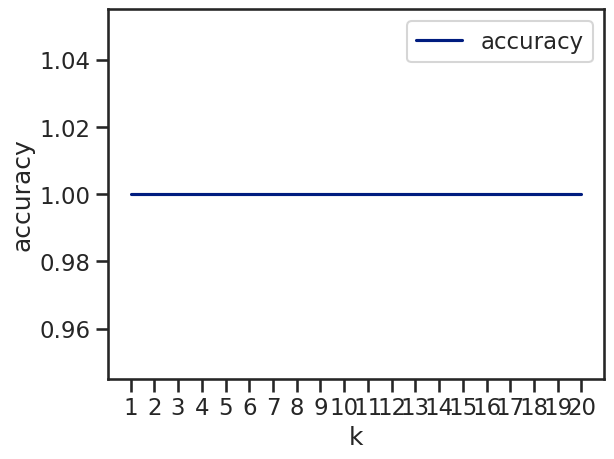

In [89]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));